# Binance data extraction project

# Generated the keys from BinanceAPI

In [1]:
apikey = '****************************************************************'
secret = '****************************************************************'

# Installing the necessary libraries

In [2]:
!pip install python-binance mplfinance

In [3]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

# Authenticate

In [4]:
client = Client(apikey, secret)

# Get Tickers

In [5]:
tickers = client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.06789000'},
 {'symbol': 'LTCBTC', 'price': '0.00327800'},
 {'symbol': 'BNBBTC', 'price': '0.01131400'},
 {'symbol': 'NEOBTC', 'price': '0.00039970'},
 {'symbol': 'QTUMETH', 'price': '0.00148400'},
 {'symbol': 'EOSETH', 'price': '0.00049170'},
 {'symbol': 'SNTETH', 'price': '0.00001259'},
 {'symbol': 'BNTETH', 'price': '0.00022390'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00010450'},
 {'symbol': 'BNBETH', 'price': '0.16660000'},
 {'symbol': 'BTCUSDT', 'price': '27197.82000000'},
 {'symbol': 'ETHUSDT', 'price': '1846.66000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00000681'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [6]:
ticker_df = pd.DataFrame(tickers)

In [7]:
ticker_df.head()

,symbol,price
0,ETHBTC,0.06789000
1,LTCBTC,0.00327800
2,BNBBTC,0.01131400
3,NEOBTC,0.00039970
4,QTUMETH,0.00148400


In [8]:
ticker_df = ticker_df.set_index('symbol')

In [9]:
ticker_df.head()

,price
symbol,
ETHBTC,0.06789000
LTCBTC,0.00327800
BNBBTC,0.01131400
NEOBTC,0.00039970
QTUMETH,0.00148400


# Get Depth

In [10]:
depth = client.get_order_book(symbol='ETHBTC')
depth

{'lastUpdateId': 6711838821,
 'bids': [['0.06788000', '39.26830000'],
  ['0.06787000', '18.81290000'],
  ['0.06786000', '23.75550000'],
  ['0.06785000', '40.79830000'],
  ['0.06784000', '9.96960000'],
  ['0.06783000', '14.51530000'],
  ['0.06782000', '12.90450000'],
  ['0.06781000', '43.97760000'],
  ['0.06780000', '19.53300000'],
  ['0.06779000', '95.55540000'],
  ['0.06778000', '35.77730000'],
  ['0.06777000', '70.80740000'],
  ['0.06776000', '7.70080000'],
  ['0.06775000', '81.50300000'],
  ['0.06774000', '6.92320000'],
  ['0.06773000', '96.62170000'],
  ['0.06772000', '3.55710000'],
  ['0.06771000', '81.84670000'],
  ['0.06770000', '103.94010000'],
  ['0.06769000', '14.27420000'],
  ['0.06768000', '3.15850000'],
  ['0.06767000', '18.83340000'],
  ['0.06766000', '31.55330000'],
  ['0.06765000', '5.57650000'],
  ['0.06764000', '172.85630000'],
  ['0.06763000', '2.73140000'],
  ['0.06762000', '3.06370000'],
  ['0.06761000', '6.45670000'],
  ['0.06760000', '38.87320000'],
  ['0.0675900

In [11]:
#we are taking only bids in our case.
depth_df = pd.DataFrame(depth['bids'])
depth_df.columns = ['Price','Volume']
depth_df.head()

,Price,Volume
0,0.06788000,39.26830000
1,0.06787000,18.81290000
2,0.06786000,23.75550000
3,0.06785000,40.79830000
4,0.06784000,9.96960000


# Get Historical data

In [12]:
historical = client.get_historical_klines('ETHBTC',Client.KLINE_INTERVAL_1DAY, '01 JAN 2011')

In [13]:
hist_df = pd.DataFrame(historical)
hist_df.columns = ['Open time','Open','High','Low','Close','Volume','Close time','Quote Asset Volume','Number of Trades','Taker buy Base Asset volume','Taker buy Quote Asset volume','Ignore']
hist_df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote Asset Volume,Number of Trades,Taker buy Base Asset volume,Taker buy Quote Asset volume,Ignore
0,1499990400000,0.08000000,0.09103300,0.08000000,0.09099300,1942.05700000,1500076799999,170.23852396,1994,1076.40500000,94.82527222,0
1,1500076800000,0.09099300,0.09369900,0.08712700,0.08763500,4013.06600000,1500163199999,363.03178785,4623,2250.31800000,203.54149755,0
2,1500163200000,0.08750800,0.08763500,0.07559100,0.08224100,8904.15800000,1500249599999,722.21248196,8137,5557.57500000,450.34388688,0
3,1500249600000,0.08236800,0.08839400,0.08169900,0.08753700,6650.93300000,1500335999999,568.24653804,7639,3859.48500000,329.66875309,0
4,1500336000000,0.08783100,0.10906800,0.08477700,0.10773200,7245.74100000,1500422399999,674.49785037,8121,4202.05500000,393.11140275,0


In [14]:
hist_df.dtypes

Open time                        int64
Open                            object
High                            object
Low                             object
Close                           object
Volume                          object
Close time                       int64
Quote Asset Volume              object
Number of Trades                 int64
Taker buy Base Asset volume     object
Taker buy Quote Asset volume    object
Ignore                          object
dtype: object

In [15]:
hist_df['Open time'] = pd.to_datetime(hist_df['Open time']/1000, unit = 's')

In [16]:
hist_df['Close time'] = pd.to_datetime(hist_df['Close time']/1000, unit = 's')

In [17]:
numerical_columns = ['Open','High','Low','Close','Volume','Quote Asset Volume','Taker buy Base Asset volume','Taker buy Quote Asset volume']
hist_df[numerical_columns] = hist_df[numerical_columns].astype(float)

In [18]:
hist_df.dtypes

Open time                       datetime64[ns]
Open                                   float64
High                                   float64
Low                                    float64
Close                                  float64
Volume                                 float64
Close time                      datetime64[ns]
Quote Asset Volume                     float64
Number of Trades                         int64
Taker buy Base Asset volume            float64
Taker buy Quote Asset volume           float64
Ignore                                  object
dtype: object

In [19]:
hist_df

,Open time,Open,High,Low,Close,Volume,Close time,Quote Asset Volume,Number of Trades,Taker buy Base Asset volume,Taker buy Quote Asset volume,Ignore
0,2017-07-14,0.080000,0.091033,0.080000,0.090993,1942.0570,2017-07-14 23:59:59.999000064,170.238524,1994,1076.4050,94.825272,0
1,2017-07-15,0.090993,0.093699,0.087127,0.087635,4013.0660,2017-07-15 23:59:59.999000064,363.031788,4623,2250.3180,203.541498,0
2,2017-07-16,0.087508,0.087635,0.075591,0.082241,8904.1580,2017-07-16 23:59:59.999000064,722.212482,8137,5557.5750,450.343887,0
3,2017-07-17,0.082368,0.088394,0.081699,0.087537,6650.9330,2017-07-17 23:59:59.999000064,568.246538,7639,3859.4850,329.668753,0
4,2017-07-18,0.087831,0.109068,0.084777,0.107732,7245.7410,2017-07-18 23:59:59.999000064,674.497850,8121,4202.0550,393.111403,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2140,2023-05-24,0.068120,0.068400,0.067790,0.068360,37543.2927,2023-05-24 23:59:59.999000064,2557.622874,75171,18842.6269,1283.805247,0
2141,2023-05-25,0.068360,0.068524,0.067800,0.068210,35087.9453,2023-05-25 23:59:59.999000064,2392.327524,72111,16580.6727,1130.885441,0
2142,2023-05-26,0.068210,0.068800,0.068080,0.068450,64315.5576,2023-05-26 23:59:59.999000064,4405.757948,82344,22750.6906,1557.869641,0
2143,2023-05-27,0.068440,0.068630,0.068130,0.068140,12044.7337,2023-05-27 23:59:59.999000064,823.774442,32381,5860.6776,400.856300,0


In [20]:
hist_df.columns

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'Quote Asset Volume', 'Number of Trades', 'Taker buy Base Asset volume',
       'Taker buy Quote Asset volume', 'Ignore'],
      dtype='object')

In [21]:
hist_df.index

RangeIndex(start=0, stop=2145, step=1)

In [22]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Open time                     2145 non-null   datetime64[ns]
 1   Open                          2145 non-null   float64       
 2   High                          2145 non-null   float64       
 3   Low                           2145 non-null   float64       
 4   Close                         2145 non-null   float64       
 5   Volume                        2145 non-null   float64       
 6   Close time                    2145 non-null   datetime64[ns]
 7   Quote Asset Volume            2145 non-null   float64       
 8   Number of Trades              2145 non-null   int64         
 9   Taker buy Base Asset volume   2145 non-null   float64       
 10  Taker buy Quote Asset volume  2145 non-null   float64       
 11  Ignore                        

In [23]:
hist_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,2145.0,0.050645,0.022336,0.016415,0.030620,0.053720,0.070753,1.130750e-01
High,2145.0,0.051737,0.022816,0.016560,0.031198,0.055169,0.071921,1.237990e-01
Low,2145.0,0.049509,0.021843,0.016150,0.029928,0.051538,0.069553,1.093430e-01
Close,2145.0,0.050639,0.022329,0.016415,0.030619,0.053719,0.070731,1.131850e-01
Volume,2145.0,177912.864877,136783.024567,1942.057000,88747.758400,140558.036100,230553.796000,1.396957e+06
Quote Asset Volume,2145.0,7662.218125,5623.615916,170.238524,4151.127518,6428.246582,9348.039615,5.683634e+04
Number of Trades,2145.0,195177.417716,128777.785612,1994.000000,115076.000000,162486.000000,239906.000000,1.201493e+06
Taker buy Base Asset volume,2145.0,89087.135890,68350.573758,1076.405000,44446.666400,71097.328000,116157.225000,7.012798e+05
Taker buy Quote Asset volume,2145.0,3829.293415,2766.929886,94.825272,2044.617213,3245.613017,4728.645707,2.834530e+04


# Visualization

In [24]:
import mplfinance as mpf

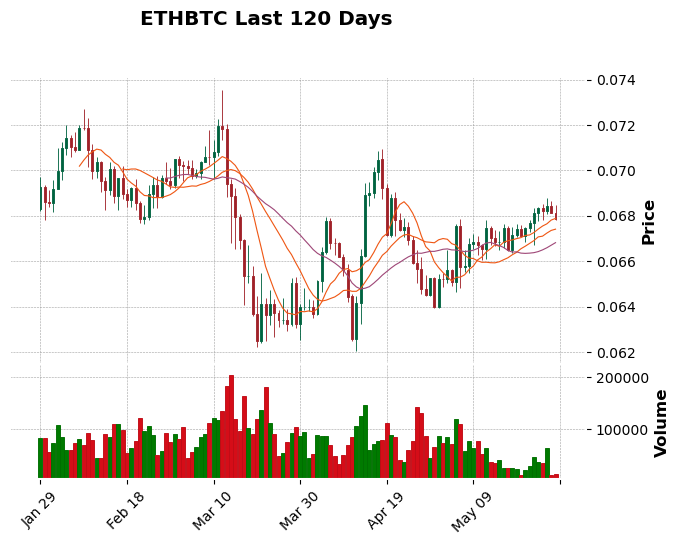

In [26]:
mpf.plot(hist_df.set_index('Close time').tail(120), type = 'candle', style = 'charles', volume = True, title = 'ETHBTC Last 120 Days', mav=(10,20,30))
